# Tanpa Perbaikan kata, tanpa Stopworld

# Preprocesing Tahap 00

In [1]:
import re
import string
import time
from copy import deepcopy

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('dataset_narasi_fixlabel.csv',sep=';')
df.head()

,Column1,Unnamed: 0,Tweets,Label
0,0,0,Ketua DPP PHRI DKI Jakarta Sutrisno Iwantono b...,1
1,1,1,"Soalnya, RKUHP yang baru berisi pasal perzinah...",1
2,2,2,"#Semuabisakena. Inget, kan, sama kampanye peno...",1
3,3,3,"Gugatannya udah kalah. Selanjutnya, Pak Jokowi...",1
4,4,4,Semoga aja amunisi Kominfo bisa efektif buat n...,0


In [4]:
df = df.drop(['Column1'], axis=1)

In [5]:
df = df.drop(['Unnamed: 0'], axis=1)

In [6]:
df.head()

,Tweets,Label
0,Ketua DPP PHRI DKI Jakarta Sutrisno Iwantono b...,1
1,"Soalnya, RKUHP yang baru berisi pasal perzinah...",1
2,"#Semuabisakena. Inget, kan, sama kampanye peno...",1
3,"Gugatannya udah kalah. Selanjutnya, Pak Jokowi...",1
4,Semoga aja amunisi Kominfo bisa efektif buat n...,0


# Preprocesing Tahap 01 

In [7]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['email', 'percent', 'money', 'phone', 'user',
        'time', 'date', 'number'],
    # terms that will be annotated
    #annotate={"hashtag", "allcaps", "elongated", "repeated",'emphasis', 'censored'},
    annotate={"hashtag"},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)


C:\Users\HP\anaconda3\lib\site-packages\ekphrasis\classes\tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...


C:\Users\HP\anaconda3\lib\site-packages\ekphrasis\classes\exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


In [8]:
def bersih_data(text):
    return " ".join(text_processor.pre_process_doc(text))
def non_ascii(text):
    return text.encode('ascii', 'replace').decode('ascii')

def remove_space_alzami(text):
    return " ".join(text.split())

def remove_emoji_alzami(text):
    return ' '.join(re.sub("([x#][A-Za-z0-9]+)"," ", text).split())

def remove_tab(text):
    return text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")

def remove_tab2(text):
    return re.sub('\s+',' ',text)

def remove_rt(text):
    return text.replace('RT'," ")

def remove_mention(text):
    return ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())

def remove_incomplete_url(text):
    return text.replace("http://", " ").replace("https://", " ")

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def remove_excessive_dot(text):
    return text.replace('..'," ")

def change_stripe(text):
    return text.replace('-'," ")

def lower(text):
    return text.lower()

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def remove_excessive_dot(text):
    return text.replace('..'," ")

def lower(text):
    return text.lower()

def remove_whitespace_LT(text):
    return text.strip()

def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

def remove_punctuation(text):
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    return re.sub(pattern, "", text) 
def remove_number_eks(text):
    return text.replace('<number>'," ")

def remove_angka(text):
    return re.sub(r"\d+", "", text) 

def remove_URL_eks(text):
    return text.replace('URL'," ").replace('url'," ")

def space_punctuation(text):
    return re.sub('(?<! )(?=[.,!?()])|(?<=[.,!?()])(?! )', r' ', text)

In [9]:
i = 0
final_string = []
s = ""
for text in df['Tweets'].values:
    filteredSentence = []
    EachReviewText = ""
    proc = remove_rt(text)
    proc = lower(proc)
    proc = change_stripe(proc)
    proc = remove_emoji_alzami(proc)
    proc = remove_tab(proc)
    proc = remove_tab2(proc)
    proc = non_ascii(proc)
    proc = remove_incomplete_url(proc)
    proc = remove_excessive_dot(proc)
    proc = remove_whitespace_LT(proc)
    proc = remove_whitespace_multiple(proc)
    proc = remove_single_char(proc)
    proc = space_punctuation(proc)
    proc = remove_punctuation(proc)
    proc = remove_space_alzami(proc)
    proc = bersih_data(proc)
    proc = remove_number_eks(proc)
    proc = remove_angka(proc) 
    proc = remove_URL_eks(proc)
    EachReviewText = proc
    final_string.append(EachReviewText)

In [10]:
df["step01"] = final_string
df.head()

,Tweets,Label,step01
0,Ketua DPP PHRI DKI Jakarta Sutrisno Iwantono b...,1,ketua dpp phri dki jakarta sutrisno iwantono b...
1,"Soalnya, RKUHP yang baru berisi pasal perzinah...",1,soalnya rkuhp yang baru berisi pasal perzinaha...
2,"#Semuabisakena. Inget, kan, sama kampanye peno...",1,inget kan sama kampanye penolakan rancangan un...
3,"Gugatannya udah kalah. Selanjutnya, Pak Jokowi...",1,gugatannya udah kalah selanjutnya pak jokowi d...
4,Semoga aja amunisi Kominfo bisa efektif buat n...,0,semoga aja amunisi kominfo bisa efektif buat n...


In [11]:
df_hapus = df[~df['step01'].str.contains(" ")]
df_hapus.head()

,Tweets,Label,step01


In [12]:
df_new = df[~df.isin(df_hapus)].dropna()

In [14]:
df_new

,Tweets,Label,step01
0,Ketua DPP PHRI DKI Jakarta Sutrisno Iwantono b...,1,ketua dpp phri dki jakarta sutrisno iwantono b...
1,"Soalnya, RKUHP yang baru berisi pasal perzinah...",1,soalnya rkuhp yang baru berisi pasal perzinaha...
2,"#Semuabisakena. Inget, kan, sama kampanye peno...",1,inget kan sama kampanye penolakan rancangan un...
3,"Gugatannya udah kalah. Selanjutnya, Pak Jokowi...",1,gugatannya udah kalah selanjutnya pak jokowi d...
4,Semoga aja amunisi Kominfo bisa efektif buat n...,0,semoga aja amunisi kominfo bisa efektif buat n...
...,...,...,...
95,Kenapa sih maksa banget jadwal pertandingan di...,1,kenapa sih maksa banget jadwal pertandingan di...
96,Kelima terdakwa dalam kasus pembunuhan Yosua t...,1,kelima terdakwa dalam kasus pembunuhan yosua t...
97,Lembaga Perlindungan Saksi dan Korban (LPSK) m...,1,lembaga perlindungan saksi dan korban lpsk men...
98,"Eliezer beserta Ferdy Sambo, Putri Candrawathi...",1,eliezer beserta ferdy sambo putri candrawathi ...


# Modeling

In [15]:
df_new["ProcessedText"]  = df_new["step01"]

In [16]:
df_new.head()

,Tweets,Label,step01,ProcessedText
0,Ketua DPP PHRI DKI Jakarta Sutrisno Iwantono b...,1,ketua dpp phri dki jakarta sutrisno iwantono b...,ketua dpp phri dki jakarta sutrisno iwantono b...
1,"Soalnya, RKUHP yang baru berisi pasal perzinah...",1,soalnya rkuhp yang baru berisi pasal perzinaha...,soalnya rkuhp yang baru berisi pasal perzinaha...
2,"#Semuabisakena. Inget, kan, sama kampanye peno...",1,inget kan sama kampanye penolakan rancangan un...,inget kan sama kampanye penolakan rancangan un...
3,"Gugatannya udah kalah. Selanjutnya, Pak Jokowi...",1,gugatannya udah kalah selanjutnya pak jokowi d...,gugatannya udah kalah selanjutnya pak jokowi d...
4,Semoga aja amunisi Kominfo bisa efektif buat n...,0,semoga aja amunisi kominfo bisa efektif buat n...,semoga aja amunisi kominfo bisa efektif buat n...


In [17]:
dataset_feature = df_new['ProcessedText']

In [18]:
dataset_label = df_new['Label']

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
dataset_label.value_counts()

0    59
1    41
Name: Label, dtype: int64

In [21]:
dataset_label.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

0    59.0%
1    41.0%
Name: Label, dtype: object

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


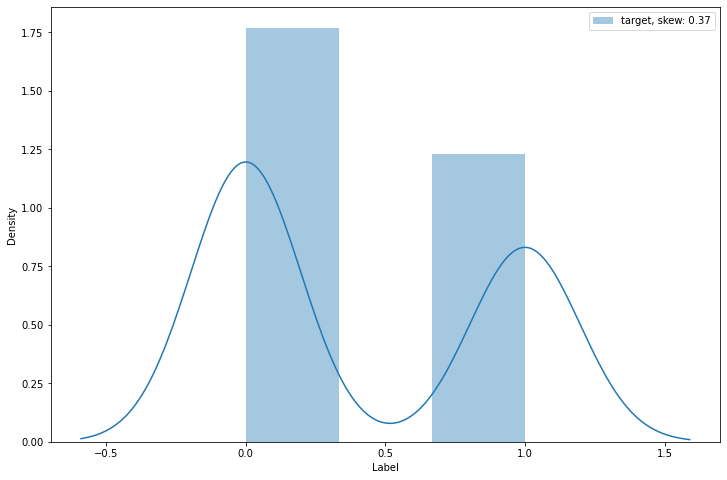

In [22]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

# TF-IDF

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
vectorizer = TfidfVectorizer()

In [25]:
politik_reviews = df_new[(df_new["Label"] == 1)]
npolitik_reviews = df_new[(df_new["Label"] == 0)]

In [26]:
politik_reviews.head()

,Tweets,Label,step01,ProcessedText
0,Ketua DPP PHRI DKI Jakarta Sutrisno Iwantono b...,1,ketua dpp phri dki jakarta sutrisno iwantono b...,ketua dpp phri dki jakarta sutrisno iwantono b...
1,"Soalnya, RKUHP yang baru berisi pasal perzinah...",1,soalnya rkuhp yang baru berisi pasal perzinaha...,soalnya rkuhp yang baru berisi pasal perzinaha...
2,"#Semuabisakena. Inget, kan, sama kampanye peno...",1,inget kan sama kampanye penolakan rancangan un...,inget kan sama kampanye penolakan rancangan un...
3,"Gugatannya udah kalah. Selanjutnya, Pak Jokowi...",1,gugatannya udah kalah selanjutnya pak jokowi d...,gugatannya udah kalah selanjutnya pak jokowi d...
5,"Menurut LBH Bogor, Irwansyah, pemerintah Kota ...",1,menurut lbh bogor irwansyah pemerintah kota bo...,menurut lbh bogor irwansyah pemerintah kota bo...


In [27]:
Politik_1_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
Politik_1_tf_idf = Politik_1_tf_idf_vect.fit_transform(politik_reviews["ProcessedText"].values)

In [28]:
Politik_1_tf_idf.shape

(41, 1031)

In [29]:
features = Politik_1_tf_idf_vect.get_feature_names()

idfValues = Politik_1_tf_idf_vect.idf_

d = dict(zip(features, 9 - idfValues))

sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

for i in range(200):
    print(sortedDict[i])

('eliezer', 6.564915474710677)
('dan', 6.459554959052851)
('yang', 6.459554959052851)
('sidang', 6.341771923396467)
('di', 6.2082405307719455)
('enggak', 6.2082405307719455)
('ferdy', 6.2082405307719455)
('ini', 6.2082405307719455)
('itu', 6.2082405307719455)
('richard', 6.2082405307719455)
('richard eliezer', 6.2082405307719455)
('co', 6.0540898509446865)
('dakwaan', 6.0540898509446865)
('dari', 6.0540898509446865)
('ferdy sambo', 6.0540898509446865)
('kasus', 6.0540898509446865)
('narasi', 6.0540898509446865)
('pembunuhan', 6.0540898509446865)
('sambo', 6.0540898509446865)
('atas', 5.871768294150732)
('bilang', 5.871768294150732)
('bisa', 5.871768294150732)
('brigadir', 5.871768294150732)
('da', 5.871768294150732)
('daily', 5.871768294150732)
('dengan', 5.871768294150732)
('justice', 5.871768294150732)
('kalo', 5.871768294150732)
('mengajukan', 5.871768294150732)
('narasi daily', 5.871768294150732)
('perdana', 5.871768294150732)
('sama', 5.871768294150732)
('sih', 5.871768294150732)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [31]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

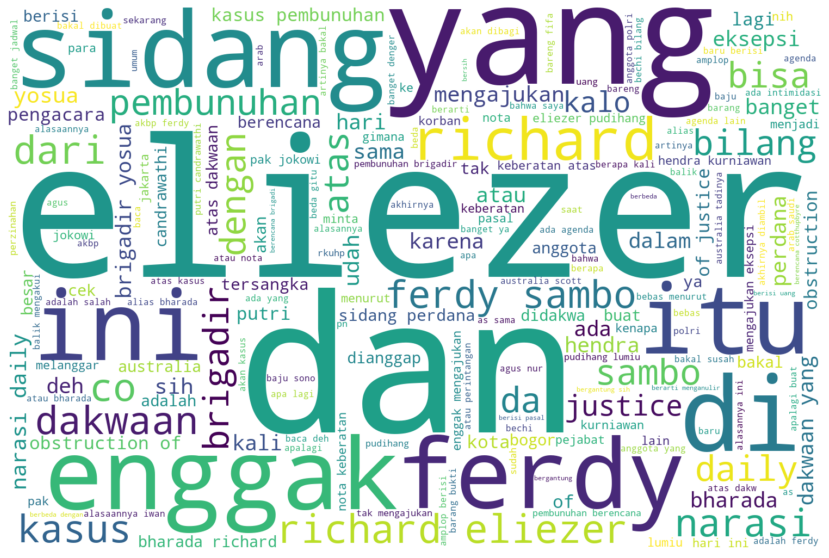

In [32]:
PlotWordCloud(d)

In [33]:
npolitik_reviews.head()

,Tweets,Label,step01,ProcessedText
4,Semoga aja amunisi Kominfo bisa efektif buat n...,0,semoga aja amunisi kominfo bisa efektif buat n...,semoga aja amunisi kominfo bisa efektif buat n...
6,"“Harapan saya untuk Arema, yang meninggal dan ...",0,harapan saya untuk arema yang meninggal dan ja...,harapan saya untuk arema yang meninggal dan ja...
9,Apa sih etilen glikol dan dietilen glikol yang...,0,apa sih etilen glikol dan dietilen glikol yang...,apa sih etilen glikol dan dietilen glikol yang...
10,"Tidak cuma keluarga, Nanda, sahabat Revan pun ...",0,tidak cuma keluarga nanda sahabat revan pun me...,tidak cuma keluarga nanda sahabat revan pun me...
11,"Dua hari sebelum peristiwa, Revan sudah berpam...",0,dua hari sebelum peristiwa revan sudah berpami...,dua hari sebelum peristiwa revan sudah berpami...


In [34]:
NPolitik_1_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
NPolitik_1_tf_idf = NPolitik_1_tf_idf_vect.fit_transform(npolitik_reviews["ProcessedText"].values)

In [35]:
NPolitik_1_tf_idf.shape

(59, 1465)

In [36]:
features = NPolitik_1_tf_idf_vect.get_feature_names()

idfValues = NPolitik_1_tf_idf_vect.idf_

d = dict(zip(features, 9 - idfValues))

sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

for i in range(200):
    print(sortedDict[i])

('yang', 6.996697891136215)
('di', 6.738868781834116)
('dan', 6.5447127673931575)
('narasi', 6.3905620875658995)
('ini', 6.30355071057627)
('daily', 6.2082405307719455)
('narasi daily', 6.2082405307719455)
('kanjuruhan', 6.102880015114119)
('lagi', 6.102880015114119)
('untuk', 6.102880015114119)
('korban', 5.985096979457735)
('ya', 5.985096979457735)
('bakal', 5.851565586833212)
('dengan', 5.851565586833212)
('ada', 5.697414907005954)
('banyak', 5.697414907005954)
('bisa', 5.697414907005954)
('dalam', 5.697414907005954)
('itu', 5.697414907005954)
('juga', 5.697414907005954)
('pada', 5.697414907005954)
('peristiwa', 5.697414907005954)
('aja', 5.515093350212)
('akan', 5.515093350212)
('akut', 5.515093350212)
('banget', 5.515093350212)
('buat', 5.515093350212)
('deh', 5.515093350212)
('fifa', 5.515093350212)
('gagal', 5.515093350212)
('ginjal', 5.515093350212)
('ginjal akut', 5.515093350212)
('karena', 5.515093350212)
('kasus', 5.515093350212)
('ke', 5.515093350212)
('masih', 5.5150933502

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [37]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

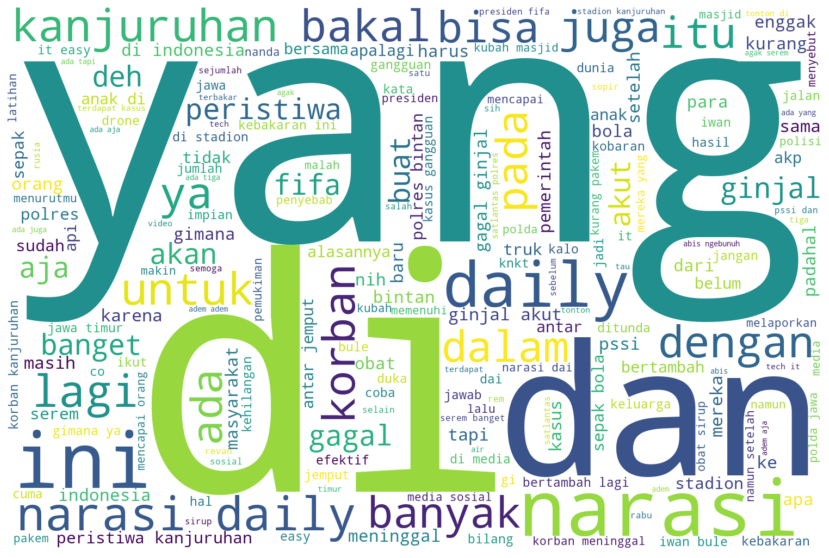

In [38]:
PlotWordCloud(d)

In [39]:
tfidf_vect = TfidfVectorizer(ngram_range = (1,2))

In [40]:
Data_TFIDF = tfidf_vect.fit_transform(df_new["ProcessedText"].values)

In [41]:
Data_TFIDF.shape

(100, 2366)

# 70-30

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [43]:
train_TFIDF, test_TFIDF, train_labels_TFIDF, test_labels_TFIDF = train_test_split(dataset_feature, dataset_label, test_size = 0.3, random_state=42)

In [44]:
train_TFIDF.shape, test_TFIDF.shape, train_labels_TFIDF.shape, test_labels_TFIDF.shape

((70,), (30,), (70,), (30,))

In [45]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
classifier_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

In [46]:
parameters_nb = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
    'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100)
}

In [47]:
classifier_nb = GridSearchCV(classifier_nb, parameters_nb, cv = 3, n_jobs=-1)

In [48]:
classifier_nb.fit(train_TFIDF, train_labels_TFIDF.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100),
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3),
                                                (1, 4)]})

# akurasi

In [49]:
y_pred_nb_train = classifier_nb.predict(train_TFIDF)
accuracy_nb_train = accuracy_score(train_labels_TFIDF, y_pred_nb_train)
print("Accuracy Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(test_TFIDF)
accuracy_nb_test = accuracy_score(test_labels_TFIDF, y_pred_nb_test)
print("Accuracy Test set: ", accuracy_nb_test)

Accuracy Training set:  1.0
Accuracy Test set:  0.8666666666666667


In [50]:
recall_nb_train = recall_score(train_labels_TFIDF, y_pred_nb_train, average='weighted')
print("Recall Training set: ", recall_nb_train)

recall_nb_test = recall_score(test_labels_TFIDF, y_pred_nb_test, average='weighted')
print("Recall Test set: ", recall_nb_test)

Recall Training set:  1.0
Recall Test set:  0.8666666666666667


In [51]:
precision_nb_train = precision_score(train_labels_TFIDF, y_pred_nb_train, average='weighted')
print("Precision Training set: ", precision_nb_train)

precision_nb_test = precision_score(test_labels_TFIDF, y_pred_nb_test, average='weighted')
print("Precision Test set: ", precision_nb_test)

Precision Training set:  1.0
Precision Test set:  0.8666666666666667


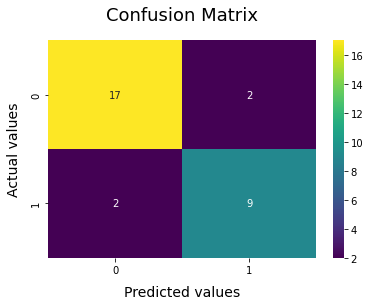

In [52]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_labels_TFIDF, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

# visualisasi

In [53]:
models = [
          ('Naive Bayes Multinomial', accuracy_nb_train, accuracy_nb_test),                    
         ]

In [54]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Naive Bayes Multinomial,1.0,0.866667


In [55]:
models_comparison = [
                        ('Naive Bayes Multinomial', accuracy_nb_test, recall_nb_test, precision_nb_test),                          
                    ]

In [56]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Naive Bayes Multinomial,0.866667,0.866667,0.866667


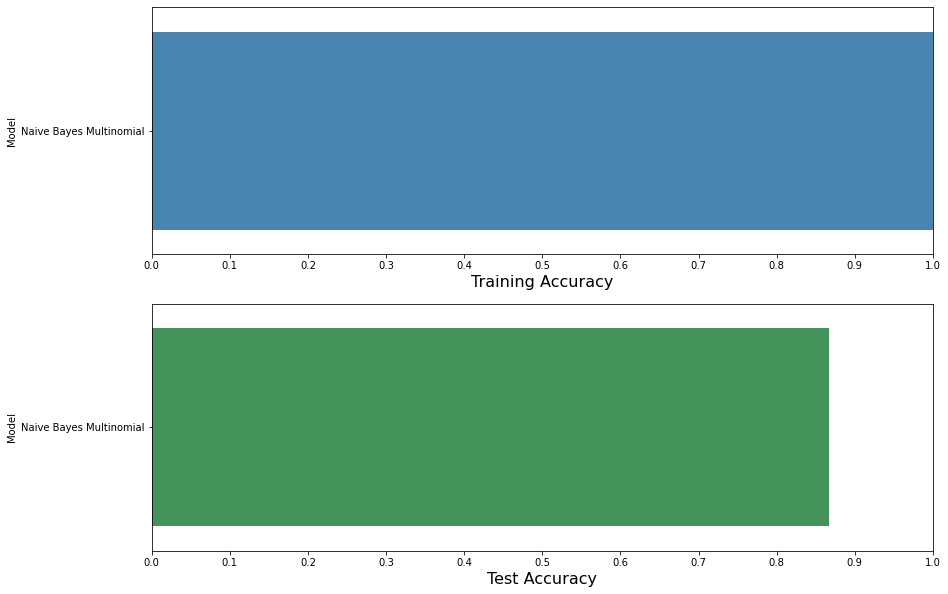

In [57]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

## Kesimpulan

hasil yang saya dapatkan setelah melakukan eksperimen klasifikasi tanpa menggunakan Normalisasi kata dan Stopworld ialah sama dengan data yang saya olah menggunakan Normalisasi kata dan Stopworld yakni dengan data training sebesar 1.0 dan data testing sebesar 0.87. 
Terjadi perbedaan pada PlotWorldCoud namun untuk nilai akurasinya tidak terdapat perbedaan pada dataset yang menggunakan normalisaki kata dan stopwords